In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.patches as mpatches
import matplotlib as mpl
from pylab import *
import functions as fn
from decimal import Decimal

kb = 1.380649e-23

In [2]:
# Parameters

L = 750. * 1e3 # Latent heat of freezing J/kg
Cp = 715. # Specific heat capacity

alphaT_l = 1e-5 # Liquid thermal diffusivity
alphaT_s = 1e-5 # Solid thermal diffusivity

alphaC_l = 1e-6 # Liquid chemical diffusivity
alphaC_s = 1e-6 # Solid chemical diffusivity

alpha_advect = 1e-2

xO = 0.05 # bulk O fraction of core (molar fraction)
dT = 200. # Supercooling (K)

n_comp_points = 10000.

dt_growth = 0.1 # Timestep for IC growth (s), diffusion ti
m, c = 0.,0.5 # max growth rate linear [m/s, x = T(K)]

r_lim = 2. # Cutoff for consideration [radius (m)]

r_resolution = min((np.array([alphaT_l,alphaT_s,alphaC_l,alphaC_s])*dt_growth)**0.5) # set the spacial
# resolution such that diffusion can always occur.

In [3]:

r,dr,P,T,x,T_adiabat,TmFe,rho = fn.initialize(xO,dT,r_lim,n_comp_points,r_resolution)
upper_boundary = [[False,T_adiabat[-1]],[True,x[-1]]] # T condition, x condition
                                                      #False = firm boundary at r_limit // True = remove all excess from boundary at each step (set as pre-defined constant at each step)  
history = []

ri = 0.
t = 0.

history.append([t, ri, r, T, x])

itterations = 1000 # Number of loop itterations
printf = 100

tic = time.process_time() 
for i in range(itterations):
    ri_old = ri
    inputs = t,ri,r,P,T,x,T_adiabat,m,c,dt_growth,dr,alphaT_l,alphaT_s,alphaC_l,alphaC_s,alpha_advect,L,Cp,n_comp_points,TmFe,rho,upper_boundary
    t_new,ri_new,r_new,T_new,x_new = fn.itterate(inputs)
    t, ri, r, T, x = t_new, ri_new, r_new.copy(), T_new.copy(), x_new.copy()
    
    if i % printf == 0:
        fn.print_progress(i,itterations,t,ri,r_lim)
        history.append([t, ri, r, T, x])
    else:
        if ri > ri_old:
            fn.print_progress(i,itterations,t,ri,r_lim)
        
toc = time.process_time() 
print(str(round((toc - tic) / real(i),10))+' seconds per step.')

/Users/fwilson/Documents/Data/Fast_Freezing/6-reboot/thermodynamic_model.py:82: RuntimeWarning: invalid value encountered in sqrt
  +24*uuu*vvv*prss**2-6*uuu**2*vvv**2* prss+36*uuu*vvv**2*prss**2+(-(-72*uuu**4*vvv**3-720 \
/Users/fwilson/Documents/Data/Fast_Freezing/6-reboot/thermodynamic_model.py:90: RuntimeWarning: invalid value encountered in sqrt
  +(-(-72*uuu**4*vvv**3-720*uuu**3*vvv**3*prss -756*uuu**2*vvv* prss**2-432*uuu**3*vvv**4*prss \
/Users/fwilson/Documents/Data/Fast_Freezing/6-reboot/thermodynamic_model.py:97: RuntimeWarning: invalid value encountered in sqrt
  +24*uuu*vvv**3*prss**2+24*uuu*vvv* prss**2-6*uuu**2*vvv**2*prss+36*uuu*vvv**2*prss**2+(-(-72*uuu**4* vvv**3 \
/Users/fwilson/Documents/Data/Fast_Freezing/6-reboot/thermodynamic_model.py:105: RuntimeWarning: invalid value encountered in sqrt
  *prss**2+24*uuu*vvv*prss**2-6* uuu**2*vvv-2*prss+36*uuu*vvv**2*prss**2+(-(-72*uuu**4*vvv**3-720* uuu**3 \
/Users/fwilson/Documents/Data/Fast_Freezing/6-reboot/thermodynamic_mo

Step: 0   out of 1000. IC = 0.00221 m. Cutoff at 2.0 m. Total time: 0.1 s.
Step: 3   out of 1000. IC = 0.00285 m. Cutoff at 2.0 m. Total time: 0.2 s.
Step: 5   out of 1000. IC = 0.00316 m. Cutoff at 2.0 m. Total time: 0.3 s.
Step: 7   out of 1000. IC = 0.00348 m. Cutoff at 2.0 m. Total time: 0.4 s.
Step: 11  out of 1000. IC = 0.00379 m. Cutoff at 2.0 m. Total time: 0.51 s.
Step: 15  out of 1000. IC = 0.00411 m. Cutoff at 2.0 m. Total time: 0.61 s.
Step: 21  out of 1000. IC = 0.00443 m. Cutoff at 2.0 m. Total time: 0.72 s.
Step: 27  out of 1000. IC = 0.00474 m. Cutoff at 2.0 m. Total time: 0.82 s.
Step: 35  out of 1000. IC = 0.00506 m. Cutoff at 2.0 m. Total time: 0.93 s.
Step: 44  out of 1000. IC = 0.00538 m. Cutoff at 2.0 m. Total time: 1.04 s.
Step: 54  out of 1000. IC = 0.00569 m. Cutoff at 2.0 m. Total time: 1.15 s.
Step: 65  out of 1000. IC = 0.00601 m. Cutoff at 2.0 m. Total time: 1.27 s.
Step: 78  out of 1000. IC = 0.00632 m. Cutoff at 2.0 m. Total time: 1.38 s.
Step: 92  out of

/var/folders/0c/744fr1ys6s5_l2rtcdlvzpfw0000gn/T/ipykernel_64972/847353479.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(map_name, len(history))


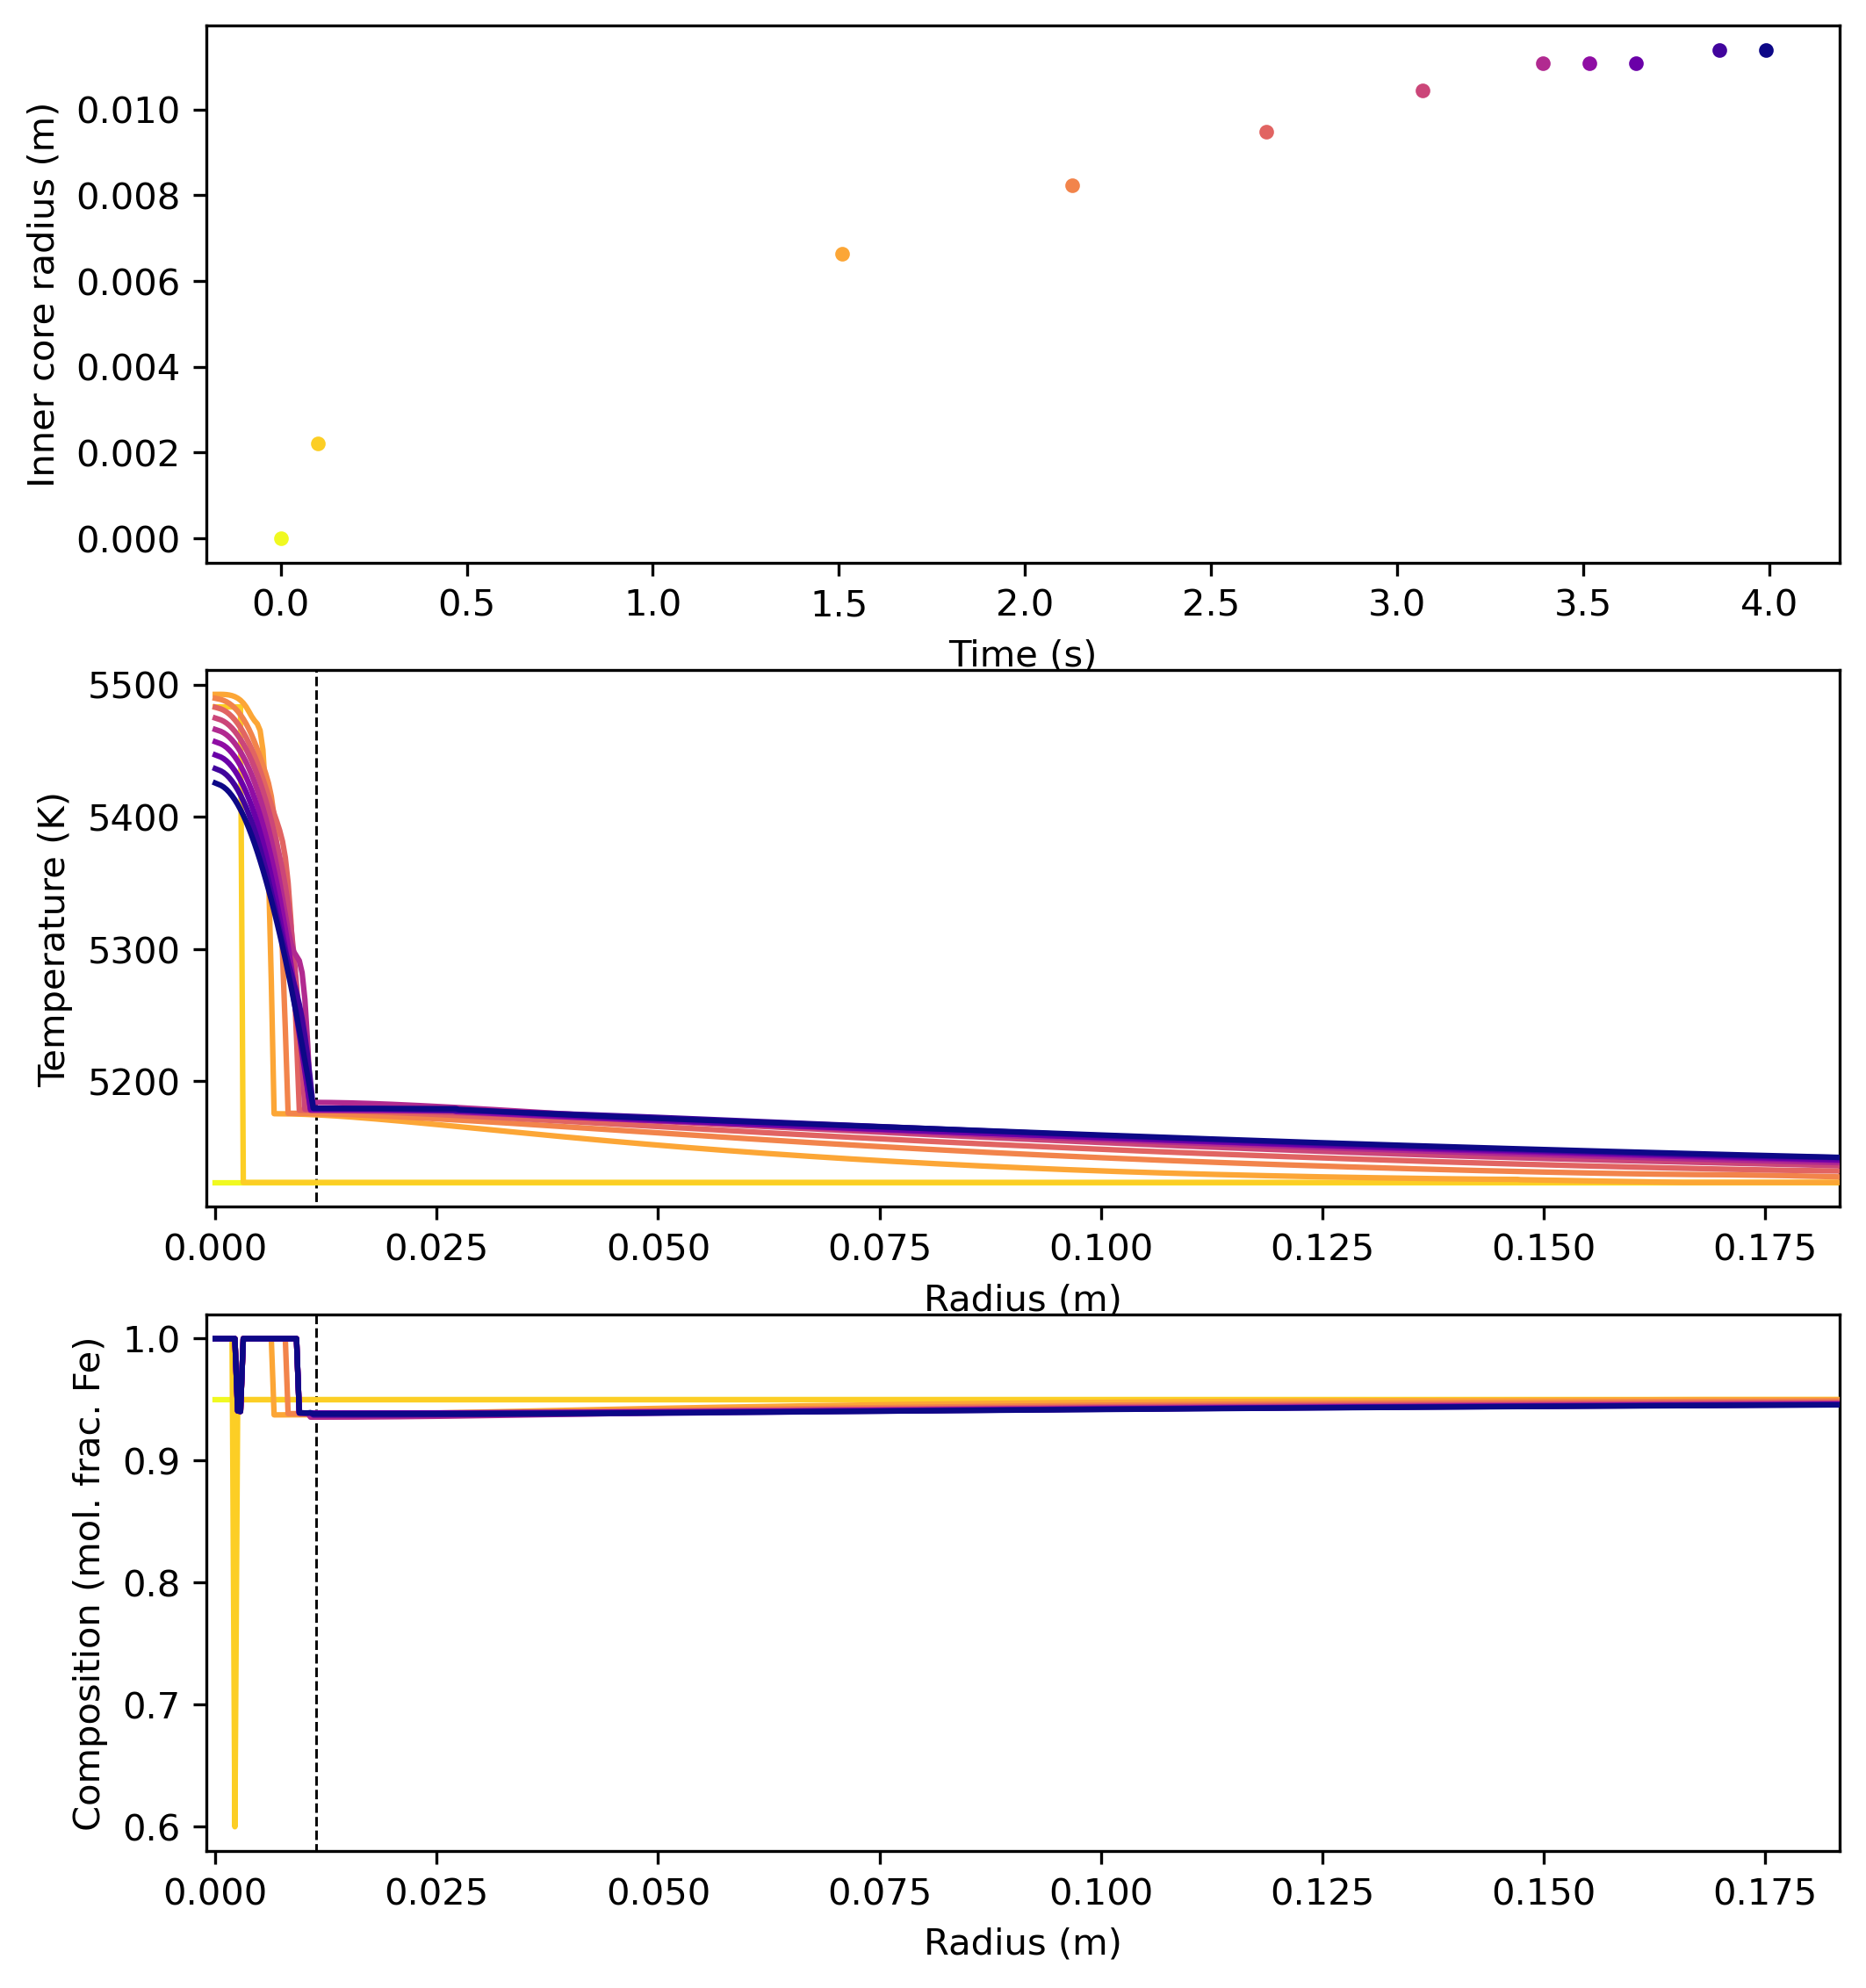

39 years to freeze the entire inner core.


In [4]:
fig, ax = plt.subplots(3, 1, dpi=300, figsize=(8,9))

map_name = 'plasma_r'
cmap = cm.get_cmap(map_name, len(history))
color_list = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ttime, radius = [], []
for i in range(len(history)):
    t,ri,r,T,x = history[i]
    ttime.append(t)
    radius.append(ri)
    
    colour = color_list[i]
    
    ax[0].scatter(t,ri,marker='.',color=colour,zorder=i+2)
    ax[1].plot(r,T,color=colour,zorder=i+2)
    ax[2].plot(r,x,color=colour,zorder=i+2)
    
labels = [['Time (s)','Inner core radius (m)'],
          ['Radius (m)','Temperature (K)'],
          ['Radius (m)','Composition (mol. frac. Fe)']]
for i in range(3):
    ax[i].set_xlabel(labels[i][0])
    ax[i].set_ylabel(labels[i][1])
    
limit = history[-1][2][np.where(history[-1][4] == 1.0)[0][-1]*20]
ri = history[-1][1]
for i in [1,2]:
    ax[i].set_xlim([-1e-3,limit])
    a, b = ax[i].get_ylim()
    ax[i].plot([ri]*2,[-1e10,1e10],color='black',linewidth=0.7,linestyle='dashed',zorder=1)
    ax[i].set_ylim([a,b])
    
filename = 'dT='+str(dT)+'_xO='+str(xO)+'_'
filename += 'tl='+str(alphaT_l)+'_'+'ts='+str(alphaT_s)+'_'+'cl='+str(alphaC_l)+'_'+'cs='+str(alphaC_s)
filename += '_adv='+str(alpha_advect)
filename += '_time='+str(round(history[-1][0],5))+'_rlim='+str(r_lim)

plt.savefig(filename+'.pdf', dpi=fig.dpi, format='pdf')
plt.show()



ttime, radius = np.array(ttime), np.array(radius)
i = int(2.*len(time)/4.)
a, b = np.polyfit(ttime[i:],radius[i:],1)
years = 60*60*24*365
print(str(int(((1221e3 - b) / a)/years))+' years to freeze the entire inner core.')

with open(filename+'.pkl', 'wb') as f:
    pickle.dump(history, f)

In [9]:
# Parameters

L = 750. * 1e3 # Latent heat of freezing J/kg
Cp = 715. # Specific heat capacity

alphaT_l = 5e-5 # Liquid thermal diffusivity
alphaT_s = 1e-5 # Solid thermal diffusivity

alphaC_l = 1e-6 # Liquid chemical diffusivity
alphaC_s = 5e-7 # Solid chemical diffusivity

alpha_advect = 1e-2

xO = 0.05 # bulk O fraction of core (molar fraction)
dT = 200. # Supercooling (K)

n_comp_points = 10000.

dt_growth = 0.1 # Timestep for IC growth (s), diffusion ti
m, c = 0.,0.5 # max growth rate linear [m/s, x = T(K)]

r_lim = 2. # Cutoff for consideration [radius (m)]

r_resolution = min((np.array([alphaT_l,alphaT_s,alphaC_l,alphaC_s])*dt_growth)**0.5) # set the spacial
# resolution such that diffusion can always occur.

In [10]:

r,dr,P,T,x,T_adiabat,TmFe,rho = fn.initialize(xO,dT,r_lim,n_comp_points,r_resolution)
upper_boundary = [[False,T_adiabat[-1]],[True,x[-1]]] # T condition, x condition
                                                      #False = firm boundary at r_limit // True = remove all excess from boundary at each step (set as pre-defined constant at each step)  
history = []

ri = 0.
t = 0.

history.append([t, ri, r, T, x])

itterations = 1000 # Number of loop itterations
printf = 100

tic = time.process_time() 
for i in range(itterations):
    ri_old = ri
    inputs = t,ri,r,P,T,x,T_adiabat,m,c,dt_growth,dr,alphaT_l,alphaT_s,alphaC_l,alphaC_s,alpha_advect,L,Cp,n_comp_points,TmFe,rho,upper_boundary
    t_new,ri_new,r_new,T_new,x_new = fn.itterate(inputs)
    t, ri, r, T, x = t_new, ri_new, r_new.copy(), T_new.copy(), x_new.copy()
    
    if i % printf == 0:
        fn.print_progress(i,itterations,t,ri,r_lim)
        history.append([t, ri, r, T, x])
    else:
        if ri > ri_old:
            fn.print_progress(i,itterations,t,ri,r_lim)
        
toc = time.process_time() 
print(str(round((toc - tic) / real(i),10))+' seconds per step.')

Step: 0   out of 1000. IC = 0.00224 m. Cutoff at 2.0 m. Total time: 0.1 s.
Step: 11  out of 1000. IC = 0.00246 m. Cutoff at 2.0 m. Total time: 0.2 s.
Step: 17  out of 1000. IC = 0.00268 m. Cutoff at 2.0 m. Total time: 0.3 s.
Step: 24  out of 1000. IC = 0.00291 m. Cutoff at 2.0 m. Total time: 0.4 s.
Step: 29  out of 1000. IC = 0.00313 m. Cutoff at 2.0 m. Total time: 0.5 s.
Step: 38  out of 1000. IC = 0.00335 m. Cutoff at 2.0 m. Total time: 0.6 s.
Step: 52  out of 1000. IC = 0.00358 m. Cutoff at 2.0 m. Total time: 0.71 s.
Step: 74  out of 1000. IC = 0.0038 m. Cutoff at 2.0 m. Total time: 0.81 s.
Step: 100 out of 1000. IC = 0.0038 m. Cutoff at 2.0 m. Total time: 0.81 s.
Step: 107 out of 1000. IC = 0.00402 m. Cutoff at 2.0 m. Total time: 0.91 s.
Step: 155 out of 1000. IC = 0.00425 m. Cutoff at 2.0 m. Total time: 1.02 s.
Step: 200 out of 1000. IC = 0.00425 m. Cutoff at 2.0 m. Total time: 1.02 s.
Step: 225 out of 1000. IC = 0.00447 m. Cutoff at 2.0 m. Total time: 1.13 s.
Step: 300 out of 100

/var/folders/0c/744fr1ys6s5_l2rtcdlvzpfw0000gn/T/ipykernel_64972/245805016.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(map_name, len(history))


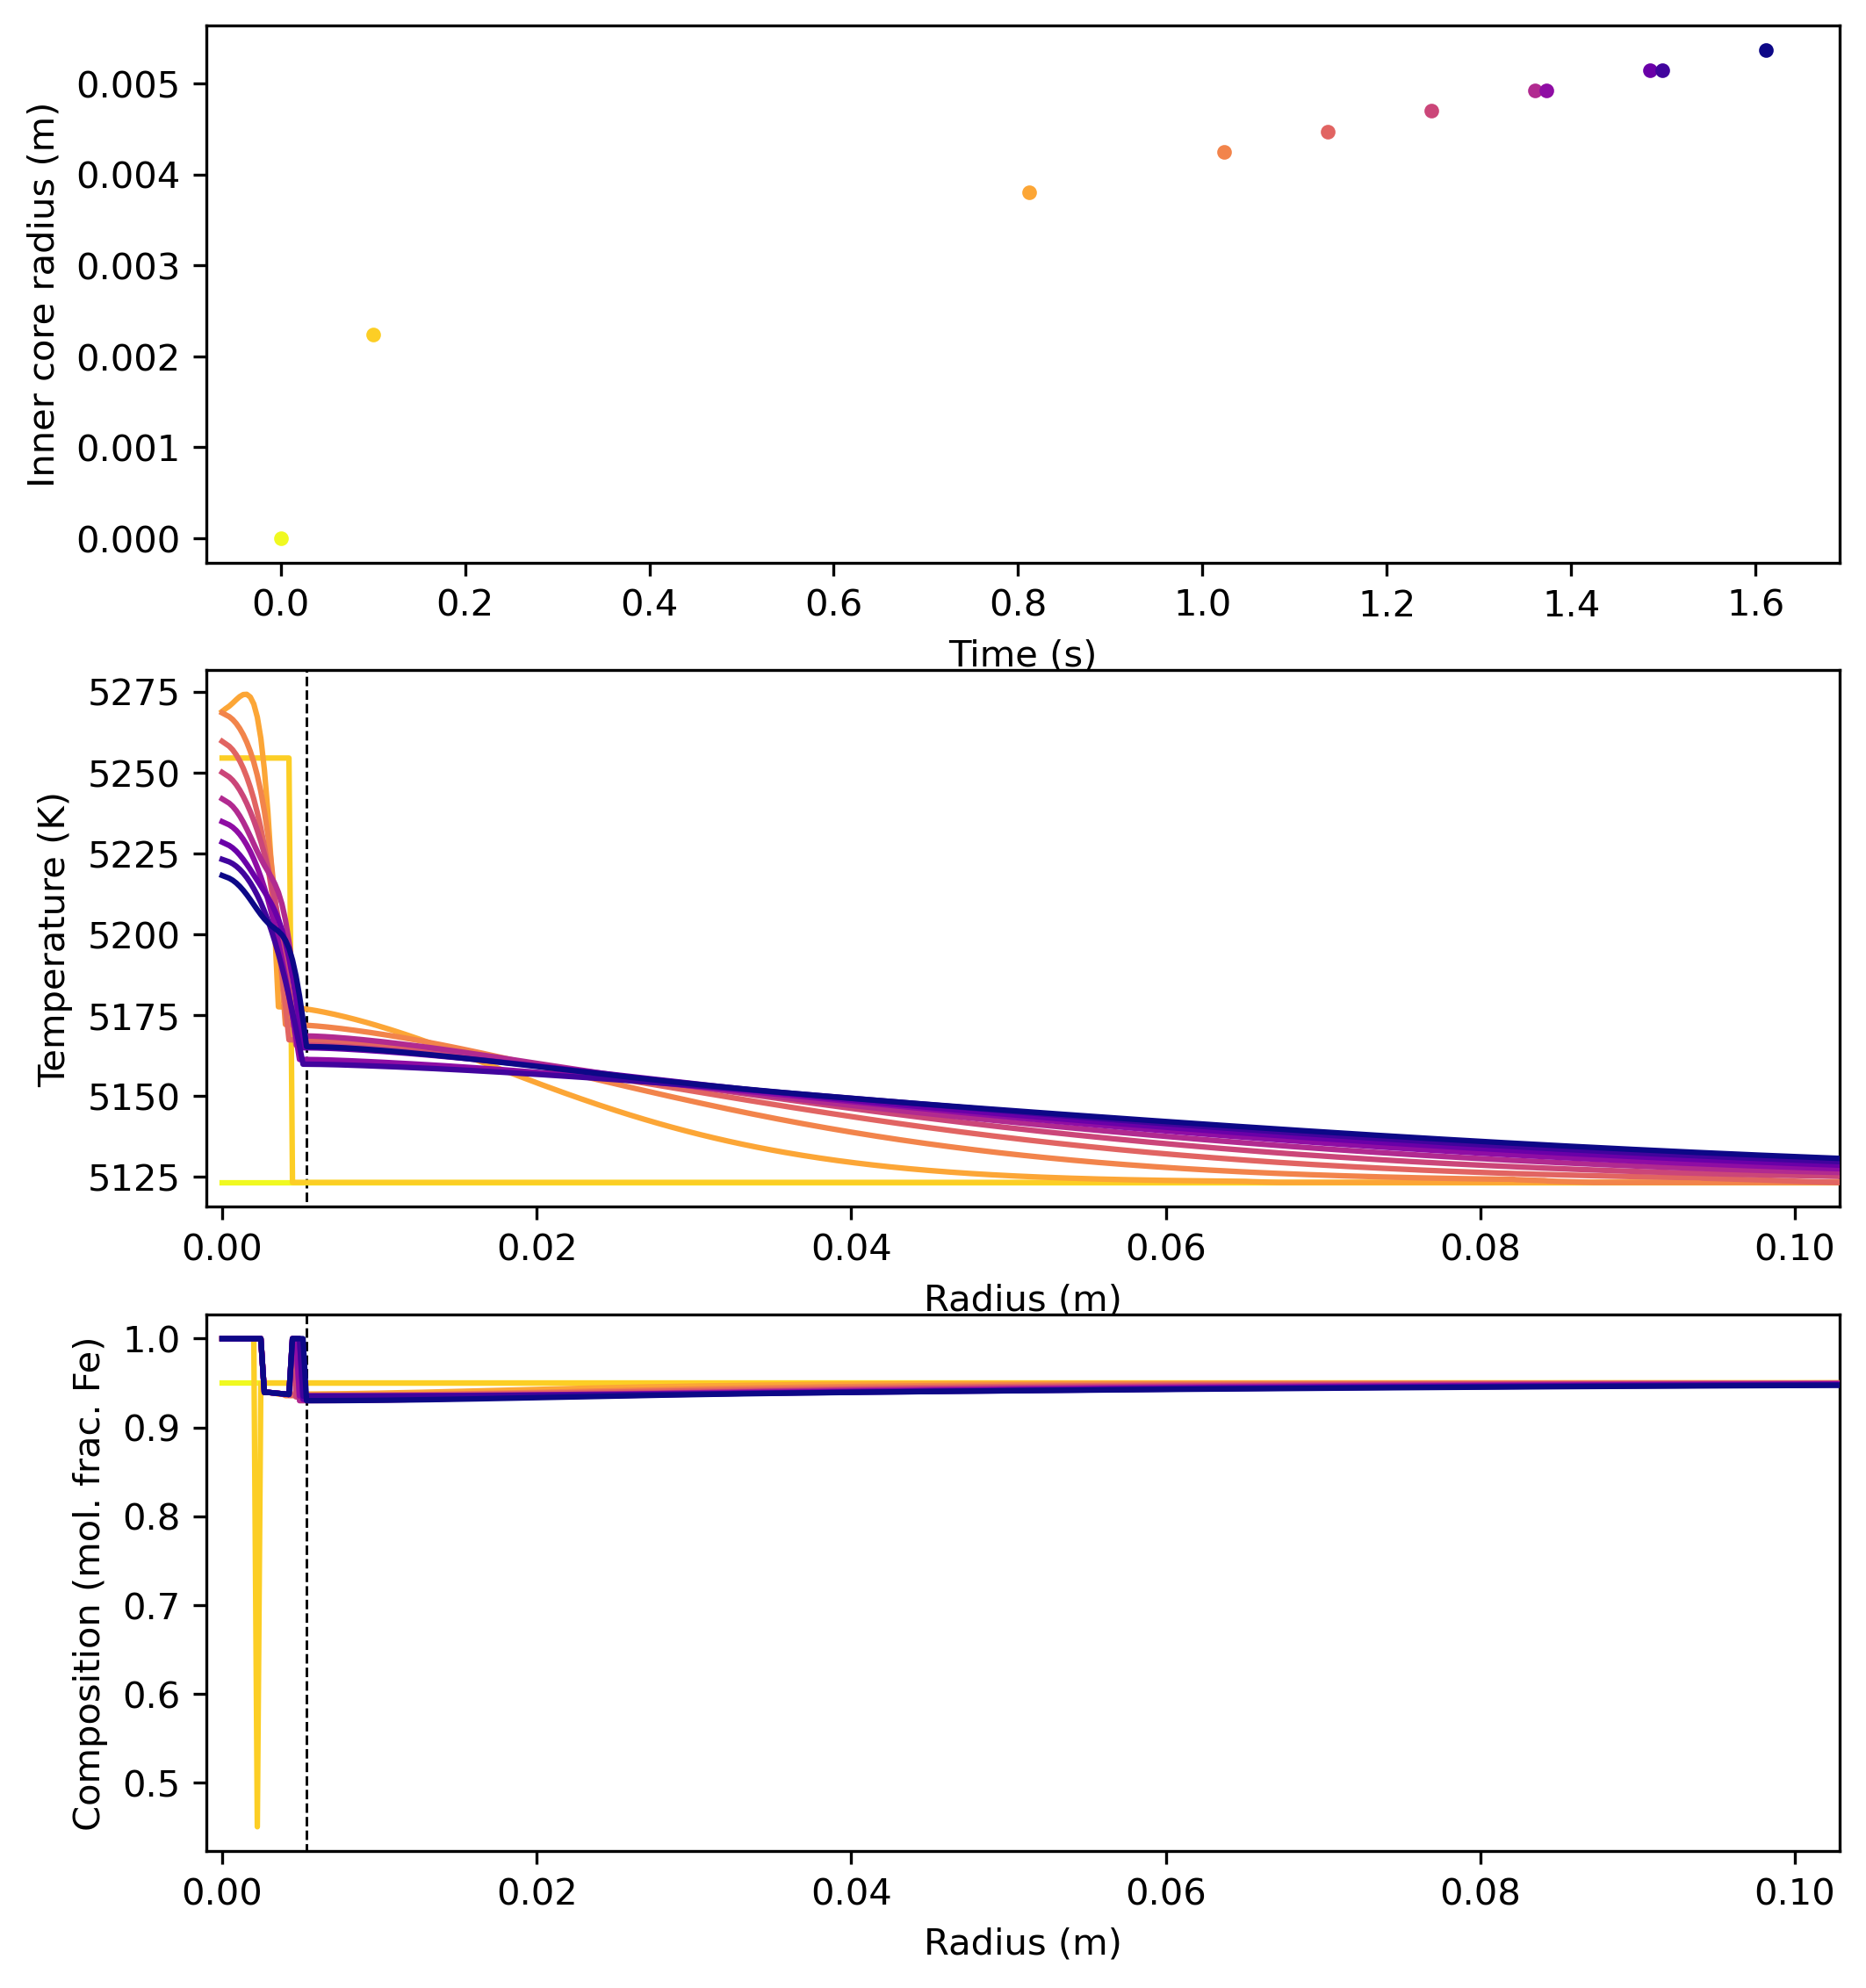

21 years to freeze the entire inner core.


In [12]:
fig, ax = plt.subplots(3, 1, dpi=300, figsize=(8,9))

map_name = 'plasma_r'
cmap = cm.get_cmap(map_name, len(history))
color_list = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ttime, radius = [], []
for i in range(len(history)):
    t,ri,r,T,x = history[i]
    ttime.append(t)
    radius.append(ri)
    
    colour = color_list[i]
    
    ax[0].scatter(t,ri,marker='.',color=colour,zorder=i+2)
    ax[1].plot(r,T,color=colour,zorder=i+2)
    ax[2].plot(r,x,color=colour,zorder=i+2)
    
labels = [['Time (s)','Inner core radius (m)'],
          ['Radius (m)','Temperature (K)'],
          ['Radius (m)','Composition (mol. frac. Fe)']]
for i in range(3):
    ax[i].set_xlabel(labels[i][0])
    ax[i].set_ylabel(labels[i][1])
    
limit = history[-1][2][np.where(history[-1][4] == 1.0)[0][-1]*20]
ri = history[-1][1]
for i in [1,2]:
    ax[i].set_xlim([-1e-3,limit])
    a, b = ax[i].get_ylim()
    ax[i].plot([ri]*2,[-1e10,1e10],color='black',linewidth=0.7,linestyle='dashed',zorder=1)
    ax[i].set_ylim([a,b])
    
filename = 'dT='+str(dT)+'_xO='+str(xO)+'_'
filename += 'tl='+str(alphaT_l)+'_'+'ts='+str(alphaT_s)+'_'+'cl='+str(alphaC_l)+'_'+'cs='+str(alphaC_s)
filename += '_adv='+str(alpha_advect)
filename += '_time='+str(round(history[-1][0],5))+'_rlim='+str(r_lim)

plt.savefig(filename+'.pdf', dpi=fig.dpi, format='pdf')
plt.show()



ttime, radius = np.array(ttime), np.array(radius)
i = int(2.*len(ttime)/4.)
a, b = np.polyfit(ttime[i:],radius[i:],1)
years = 60*60*24*365
print(str(int(((1221e3 - b) / a)/years))+' years to freeze the entire inner core.')

with open(filename+'.pkl', 'wb') as f:
    pickle.dump(history, f)